# EDA Canciones más escuchadas en Spotify 
## (TOP 50 de 72 paises + TOP 50 Global)

A continuación realizamos un Análisis Expolartorio de los datos que hemos obtenido de los datasets cargados en la carpeta /data/raw. Se corresponden a un listado de paises y a los datos de la plataforma lider en streaming de audio Spotify (en particular del Top50 de 72 paises + uno global), filtrados entre el 11/05/2024 y el 11/06/2024.

Para facilitar este análisis hemos ido trabajando y preparando los datos en los archivos: 'preparacion.ipynb' y 'transformacion.ipynb'. Analizando estos datos de Spotify, podemos lograr obtener una visión acotada del panorama musical durante ese periodo. Con la conjuncion de los datasets vamos a poder ver las similitudes y diferencias respecto a los gustos musicales de las distintas zonas del planeta. 

A lo largo del análisis he encontrado diferentes misterios musicales que me han permitido descubrir características musicales concretas de regiones concretas que han sido nuevas para mi. Si quieres sumergirte por ti mismo, te animo a que explores y filtres los datos para saciar tu curiosidad.  

Para preparar y realizar este análisis he usado diferentes herramientas y bibliotecas de Python, así como Power BI, para el dashboard (/dashboard/dashboard_spotify.pbix)

In [1]:
# Importamos las bibliotecas necesarias para el EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el archivo con el que realizamos el EDA

spotify_ultimo_mes_final = pd.read_csv("../data/processed/spotify_dataset_final.csv")

In [2]:
# Listamos las columnas del DataFrame
print(spotify_ultimo_mes_final.columns)

Index(['spotify_id', 'name', 'main_artist', 'featuring_artists',
       'no_of_artists', 'daily_rank', 'daily_movement', 'weekly_movement',
       'country', 'country_name', 'region', 'snapshot_date', 'popularity',
       'is_explicit', 'duration', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key_americana', 'key_latina', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'compas', 'escala_musical'],
      dtype='object')


Una vez obtenida la lista de todas las columnas, se muestra la información relevante de cada una para este EDA.

In [3]:
#Creamos un script para analizar las columnas y que nos muestre la información relevante de cada una para este EDA.
columnas =['spotify_id', 'name', 'main_artist', 'featuring_artists',
       'no_of_artists', 'daily_rank', 'daily_movement', 'weekly_movement',
       'country', 'country_name', 'region', 'snapshot_date', 'popularity',
       'is_explicit', 'duration', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key_americana', 'key_latina', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'compas']


for col in columnas:
    print(f"Descripción de [{col}]:")
    print(spotify_ultimo_mes_final[col].describe(include='all'))
    print('=====')

Descripción de [spotify_id]:
count                     116800
unique                      3360
top       2qSkIjg1o9h3YT9RAgYN75
freq                        1614
Name: spotify_id, dtype: object
=====
Descripción de [name]:
count       116800
unique        3282
top       Espresso
freq          1614
Name: name, dtype: object
=====
Descripción de [main_artist]:
count            116799
unique             1793
top       Billie Eilish
freq               5775
Name: main_artist, dtype: object
=====
Descripción de [featuring_artists]:
count     46267
unique     1217
top        Feid
freq       1437
Name: featuring_artists, dtype: object
=====
Descripción de [no_of_artists]:
count     116800
unique         3
top            1
freq       70533
Name: no_of_artists, dtype: object
=====
Descripción de [daily_rank]:
count    116800.000000
mean         25.500000
std          14.430931
min           1.000000
25%          13.000000
50%          25.500000
75%          38.000000
max          50.000000
Name: 

Observando las descripciones de cada columna, vemos que hay muchas formas de las que podemos analizar estos datos. Vemos que tenemos variables categorías y continuas (que acabamos de revisar), que enriquecen la información y dan más detalle sobre las canciones y las posiciones que ocupa en los distintos rankings (ya sea el global o por país).  

Dos de las columnas más interesantes para estudiar serían daily_rank y daily_movement, ya que así podemos ver cómo ha ido evolucionando la posición a lo largo del tiempo (si cruzamos los datos con snapshot_date). En cuanto a la popularidad de las canciones podemos analizar que artistas (main_artist) han sido los más escuchados, por el número de veces que aparecen en los rankings.  

En cuanto a la receta para una canción de éxito podemos medir los diferentes atributos que proporciona el dataset, para ver que puntos comparten o son diferentes entre cada una de los países/regiones (continentes), en los éxitos del periodo estudiado.  

También se puede hacer un análisis a nivel geográfico ya que disponemos de información relativa a los países y continentes que tienen un TOP50 propio en Spotify, así como comparar las similitudes o diferencias con el TOP50 global.  

Posibles mejoras para enriquecimiento de datos, para futuras versiones o  revisiones:  

- No aparece el país de origen del artista y podría ser interesante ver la popularidad de un artista en su país de origen respecto al resto de países
- No aparece nada relativo a los idiomas, ni de la canción ni de los hablados en cada país, y podría ser un enfoque interesante ver el peso de los diferentes idiomas y en los diferentes mercados.
- No se hace referencia al género de las canciones, y podría ser interesante ver que géneros son más populares en cada país/continente.
- No hay datos del total de streams de cada canción.

## EDA: TOP 50 Global

Tras esta pequeña introducción, comenzamos con el análisis. Primero centrando el foco en el TOP50 Global:  

Empezamos con el análisis diario del ranking, para ver el rendimiento de las canciones en el periodo estudiado:  

- ¿Qué canciones son las más populares? Es decir, las que han permanecido más tiempo en las listas.
- ¿Qué canciones han variado más su posición (hacia arriba o abajo) en el ranking?
- ¿Ha ocurrido algún acontecimiento que afecte a las posiciones que ocupan las canciones? Ej.: Lanzamiento de algún álbum.

Vamos a empezar el estudio con esta variable en el TOP50 Global, como hay muchas canciones que aparecen en el TOP50, nos limitaremos a las más escuchadas. Primero de todo, comprobamos cuantas fechas vamos a estudiar:

In [4]:
# Asegurar que snapshot_date es tipo datetime
spotify_ultimo_mes_final['snapshot_date'] = pd.to_datetime(spotify_ultimo_mes_final['snapshot_date'])

# Rescatamos las fechas únicas del DataFrame filtrado
fechas_unicas = spotify_ultimo_mes_final['snapshot_date'].sort_values().unique()

# Mostrarlas en formato legible
print("Total de fechas únicas:", len(fechas_unicas))
print("Fechas únicas:")
for fecha in fechas_unicas:
    print(fecha.strftime('%Y-%m-%d'))


Total de fechas únicas: 32
Fechas únicas:
2024-05-11
2024-05-12
2024-05-13
2024-05-14
2024-05-15
2024-05-16
2024-05-17
2024-05-18
2024-05-19
2024-05-20
2024-05-21
2024-05-22
2024-05-23
2024-05-24
2024-05-25
2024-05-26
2024-05-27
2024-05-28
2024-05-29
2024-05-30
2024-05-31
2024-06-01
2024-06-02
2024-06-03
2024-06-04
2024-06-05
2024-06-06
2024-06-07
2024-06-08
2024-06-09
2024-06-10
2024-06-11


Sabiendo que estudiaremos 32 días, ya tenemos el total de veces que una canción puede aparecer, en cualquiera de los TOP50, así que ahora vamos a centrarnos en el TOP50 Global ('country'= XX), para hacer primero un estudio a nivel mundial

In [5]:
# Filtrar el dataset para el TOP50 Global ('country' = 'XX')
spotify_global = spotify_ultimo_mes_final[spotify_ultimo_mes_final['country'] == 'XX'].copy()

In [6]:
#Asegurar que snapshot_date es tipo datetime
spotify_global['snapshot_date'] = pd.to_datetime(spotify_global['snapshot_date'])

#Contamos las canciones únicas que aparecen en el TOP50 Global de cada fecha registrada
canciones_unicas_dia = (
    spotify_global
    .groupby('snapshot_date')['spotify_id']
    .nunique()
    .reset_index(name='Canciones_únicas')
)

# Contar cuántas canciones han estado exactamente 32 veces (una vez por día)
conteo_canciones = spotify_global.drop_duplicates(subset=['spotify_id', 'snapshot_date'])

canciones_unicas = (
    spotify_global
    .assign(Count=conteo_canciones.groupby('spotify_id')['spotify_id'].transform('count'))
)

# Filtrar canciones que aparecen exactamente 32 veces
canciones_unicas = canciones_unicas[canciones_unicas['Count'] == 32]

# Contar cuántas canciones cumplen esa condición
conteo_canciones_unicas = canciones_unicas['spotify_id'].nunique()

print(f"\nCanciones únicas que aparecen los 32 días en el Top 50 Global: {conteo_canciones_unicas}")


Canciones únicas que aparecen los 32 días en el Top 50 Global: 25


Llama la atención que justo la mitad (25) del top de canciones, aparecen los 32 días en el ranking Global (sin importar el puesto que ocupen). De estas canciones rescatamos el TOP10 junto con el cálculo del puesto medio que han ocupado:

In [7]:
# Agrupar por spotify_id, name y main_artist para calcular el ranking medio
top10_global = (
    canciones_unicas
    .groupby(['spotify_id', 'name', 'main_artist'], as_index=False)
    .agg(mean_rank=('daily_rank', 'mean'))
    .assign(mean_rank=lambda df: df['mean_rank'].round(2))  # Redondear si quieres
    .sort_values(by='mean_rank')
    .head(10)  # Top 10 con mejor ranking medio
)

# Mostrar resultados de forma legible
print("\nTop 10 canciones con mejor ranking promedio en el Top 50 Global:\n")
for i, row in top10_global.iterrows():
    print(f"{row['name']} - {row['main_artist']} | Ranking medio: {row['mean_rank']}")


Top 10 canciones con mejor ranking promedio en el Top 50 Global:

Espresso - Sabrina Carpenter | Ranking medio: 1.97
Not Like Us - Kendrick Lamar | Ranking medio: 5.31
I Had Some Help (Feat. Morgan Wallen) - Post Malone | Ranking medio: 6.22
Gata Only - FloyyMenor | Ranking medio: 6.44
Too Sweet - Hozier | Ranking medio: 9.25
i like the way you kiss me - Artemas | Ranking medio: 9.59
Beautiful Things - Benson Boone | Ranking medio: 11.0
Fortnight (feat. Post Malone) - Taylor Swift | Ranking medio: 13.06
we can't be friends (wait for your love) - Ariana Grande | Ranking medio: 14.59
End of Beginning - Djo | Ranking medio: 15.41


Con el TOP 10 identificado y sabiendo el puesto promedio, vamos a ver la evolución diaria por canción:

In [8]:
# Filtrar spotify_global para quedarte solo con las canciones del top10_global
top10_trayectoria = spotify_global[
    spotify_global['spotify_id'].isin(top10_global['spotify_id'])
].copy()

# Verificación: ¿cada canción tiene 32 fechas?
verificacion = top10_trayectoria.groupby('spotify_id')['snapshot_date'].nunique()
print("\nNúmero de días registrados por canción en top10_trayectoria:\n")
print(verificacion)

# Mostrar una muestra del dataframe final
print("\nVista previa de top10_trayectoria:\n")
print(top10_trayectoria[['spotify_id', 'name', 'main_artist', 'snapshot_date', 'daily_rank']].head(10))



Número de días registrados por canción en top10_trayectoria:

spotify_id
2GxrNKugF82CnoRFbQfzPf    32
2OzhQlSqBEmt7hmkYxfT6m    32
2qSkIjg1o9h3YT9RAgYN75    32
3qhlB30KknSejmIvZZLjOD    32
3xkHsmpQCBMytMJNiDf3Ii    32
51ZQ1vr10ffzbwIjDCwqm4    32
5Z0UnEtpLDQyYlWwgi8m9C    32
6AI3ezQ4o3HUoP6Dhudph3    32
6XjDF6nds4DE2BBbagZol6    32
7221xIgOnuakPdLqT0F3nP    32
Name: snapshot_date, dtype: int64

Vista previa de top10_trayectoria:

                spotify_id                                      name  \
0   2qSkIjg1o9h3YT9RAgYN75                                  Espresso   
5   6XjDF6nds4DE2BBbagZol6                                 Gata Only   
7   5Z0UnEtpLDQyYlWwgi8m9C                                 Too Sweet   
9   7221xIgOnuakPdLqT0F3nP     I Had Some Help (Feat. Morgan Wallen)   
10  3xkHsmpQCBMytMJNiDf3Ii                          Beautiful Things   
11  2GxrNKugF82CnoRFbQfzPf                i like the way you kiss me   
12  6AI3ezQ4o3HUoP6Dhudph3                               Not 

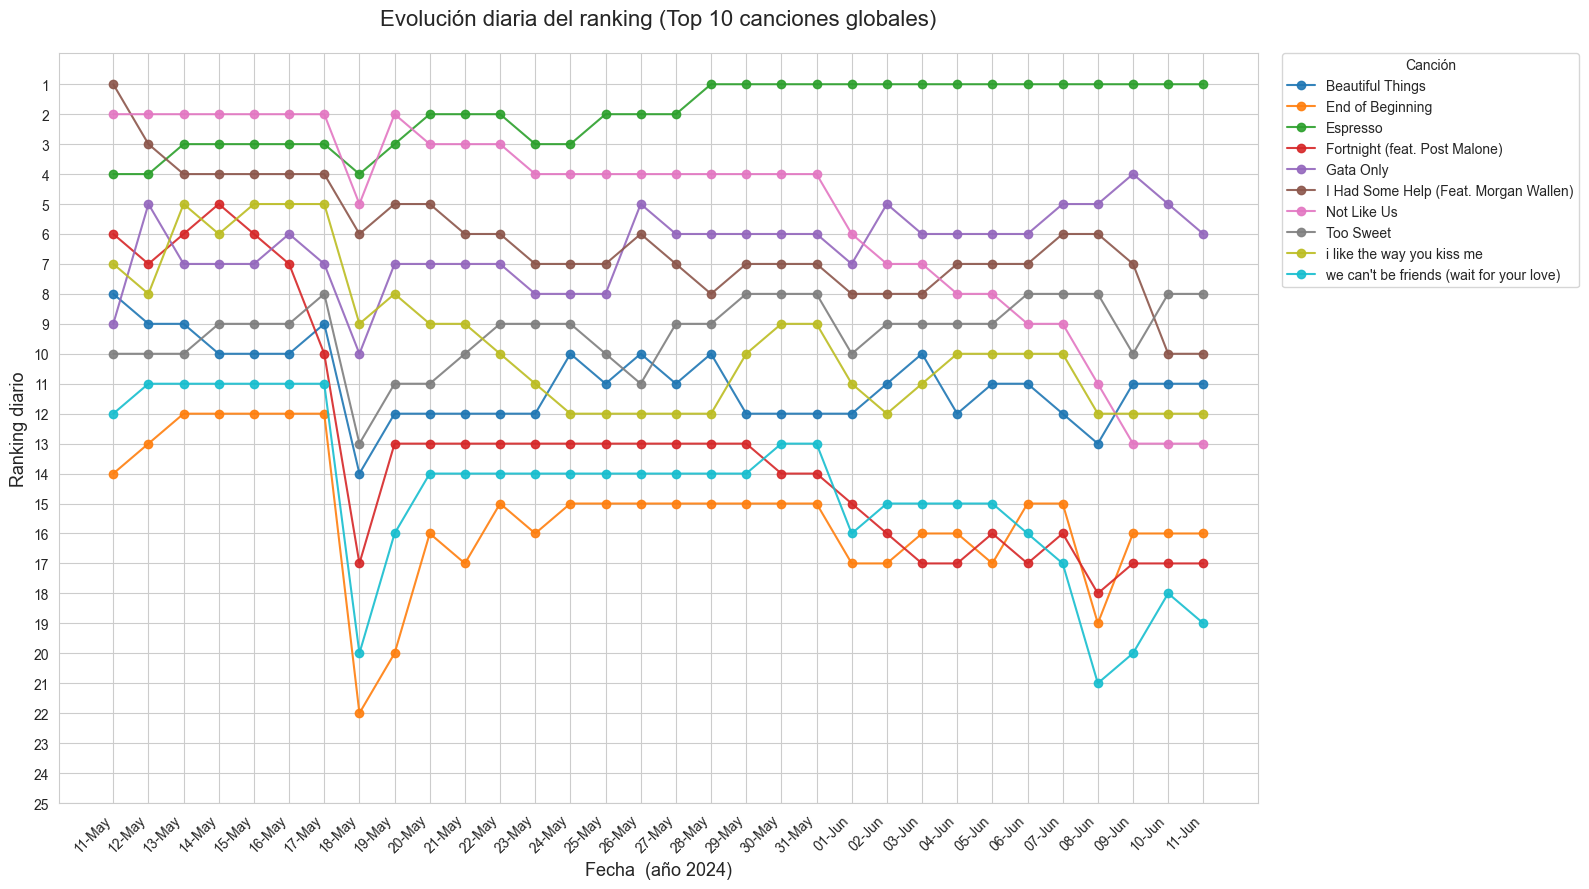

In [9]:
# Asegurar que snapshot_date está en formato datetime
top10_trayectoria['snapshot_date'] = pd.to_datetime(top10_trayectoria['snapshot_date'])

# Ordenar fechas únicas
fechas_ordenadas = sorted(top10_trayectoria['snapshot_date'].unique())

# Crear el gráfico
plt.figure(figsize=(16, 9))
sns.set_style("whitegrid")

# Paleta de colores personalizada
palette = sns.color_palette("tab10", n_colors=10)

# Graficar cada canción por separado
for i, (name, group) in enumerate(top10_trayectoria.groupby('name')):
    group = group.sort_values('snapshot_date')
    plt.plot(
        group['snapshot_date'],
        group['daily_rank'],
        marker='o',
        linestyle='-',
        label=name,
        color=palette[i],
        markersize=6,
        alpha=0.9
    )

# Configuración del gráfico
plt.title("Evolución diaria del ranking (Top 10 canciones globales)", fontsize=16, pad=20)
plt.xlabel("Fecha  (año 2024)", fontsize=13)
plt.ylabel("Ranking diario", fontsize=13)
plt.gca().invert_yaxis()  # Ranking 1 arriba
plt.yticks(range(1, 26))  # Rango de 1 a 35
plt.xticks(ticks=fechas_ordenadas, labels=[f.strftime('%d-%b') for f in fechas_ordenadas], rotation=45, ha='right')

# Leyenda y layout
plt.legend(title="Canción", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


Mirando el gráfico, vemos un descenso simultaneo y general además de poco orgánico, salvo para 'Espressso' de Sabrina Carpenter. Luego todas las canciones más o menos se van recuperando en el ranking, para comenzar una fluctuación esta vez sí más orgánica. Teniendo en cuenta cómo funciona la industria musical hoy en día, el descenso general de las canciones el 18 de Mayo, seguramente se deba al lanzamiento de un nuevo disco de un artista con gran fama mundial, que sea capaz de perturbar así el ranking mundial y solo un día. Además de este fenómeno, que analizaremos después, en la gráfica podemos observar:

- 'Espresso' de Sabrina Carpenter tiene la racha más larga conservando el mismo puesto (15 días en el TOP1), seguida de 'Fornight' de Taylor Swift (ft. Post Malone) (11 días en el TOP13), y 'we can't be friends (wait for your love)' de Ariana Grande (10 días en el TOP14)
- De igual manera, Espresso, ha sido la única canción que se ha mantenido los 32 días dentro del TOP5
- Del TOP10 solo dos canciones han alcanzado el TOP1 en el periodo medido, que son 'Espresso' de Sabrina Carpenter y 'I had some help' de Post Malone ft. Morgan Wallen
- Ha habido 16 días en los que canciones fuera del TOP10 han sido la más escuchada (eso también lo veremos después).
- 'End of Beginning' ha sido la canción con la mayor diferencia de puesto de un día a otro (10 puestos, en el señalado 18 de Mayo)
- 'Fornight' de Taylor Swift (ft. Post Malone) y 'we can't be friends (wait for your love)' de Ariana Grande, son las canciones con mejor variación positiva de un día a otro (4 puesto del 18 al 19 de Mayo).

Vamos a analizar que ocurrió el 18 de Mayo, teniendo en cuenta que las estadísticas se hacen a día vencido, tenemos que fijarnos en que lanzamiento musical salió al mercado el 17 de Mayo:

In [10]:
# Asegurar que album_release_date es datetime
spotify_global['album_release_date'] = pd.to_datetime(spotify_global['album_release_date'], errors='coerce')

# Filtrar canciones con fecha de lanzamiento el 18 de mayo
lanzamiento_17mayo = spotify_global[
    spotify_global['album_release_date'].dt.date == pd.to_datetime('2024-05-17').date()
]

# Ver resultados únicos por canción
canciones_17mayo_unicas = lanzamiento_17mayo[['name', 'main_artist', 'album_name']].drop_duplicates()
print(f"Canciones lanzadas el 17 de mayo (2024): {len(canciones_17mayo_unicas)}")
display(canciones_17mayo_unicas)


Canciones lanzadas el 17 de mayo (2024): 10


,name,main_artist,album_name
2,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT
6,LUNCH,Billie Eilish,HIT ME HARD AND SOFT
13,CHIHIRO,Billie Eilish,HIT ME HARD AND SOFT
28,WILDFLOWER,Billie Eilish,HIT ME HARD AND SOFT
36,BLUE,Billie Eilish,HIT ME HARD AND SOFT
37,L’AMOUR DE MA VIE,Billie Eilish,HIT ME HARD AND SOFT
36549,THE GREATEST,Billie Eilish,HIT ME HARD AND SOFT
40194,SKINNY,Billie Eilish,HIT ME HARD AND SOFT
47499,THE DINER,Billie Eilish,HIT ME HARD AND SOFT
62093,BITTERSUITE,Billie Eilish,HIT ME HARD AND SOFT


Como habíamos predicho, la disrupción en el TOP10 se debe al lanzamiento de un álbum. Una de las artistas más reconocidas del planeta, Billie Eilish, provocó esta disrupción en el ranking de streams, con el lanzamiento de su album 'Hit me hard and Soft'. Vamos a estudiar como evolucionaron cada una de las canciones de dicho álbum:

In [11]:
# Filtrar por snapshot_date del 18 de mayo
ranking_18mayo = spotify_global[
    (spotify_global['snapshot_date'].dt.date == pd.to_datetime('2024-05-18').date()) &
    (spotify_global['spotify_id'].isin(lanzamiento_17mayo['spotify_id']))
][['spotify_id', 'name', 'main_artist', 'daily_rank', 'daily_movement']]

print("Ranking canciones del album 'Hit me hard and soft' el 18 de mayo:")
display(ranking_18mayo.sort_values('daily_rank'))

Ranking canciones del album 'Hit me hard and soft' el 18 de mayo:


,spotify_id,name,main_artist,daily_rank,daily_movement
87601,629DixmZGHc7ILtEntuiWE,LUNCH,Billie Eilish,2,48
87602,7BRD7x5pt8Lqa1eGYC4dzj,CHIHIRO,Billie Eilish,3,47
87606,1CsMKhwEmNnmvHUuO5nryA,SKINNY,Billie Eilish,7,43
87607,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,8,42
87610,3QaPy1KgI7nu9FJEQUgn6h,WILDFLOWER,Billie Eilish,11,39
87614,6fPan2saHdFaIHuTSatORv,L’AMOUR DE MA VIE,Billie Eilish,15,35
87615,6TGd66r0nlPaYm3KIoI7ET,THE GREATEST,Billie Eilish,16,34
87617,2prqm9sPLj10B4Wg0wE5x9,BLUE,Billie Eilish,18,32
87618,1LLUoftvmTjVNBHZoQyveF,THE DINER,Billie Eilish,19,31
87620,7DpUoxGSdlDHfqCYj0otzU,BITTERSUITE,Billie Eilish,21,29


Ahora vamos a buscar las canciones que no pertenecen al TOP10, que han sido TOP1, incluidas (si hay alguna) del álbum de Billie Eilish

In [12]:
# Asegurar que snapshot_date es datetime
spotify_global['snapshot_date'] = pd.to_datetime(spotify_global['snapshot_date'])

# Filtrar fechas del 12 al 27 de mayo
rango_fecha = (spotify_global['snapshot_date'] >= '2024-05-12') & (spotify_global['snapshot_date'] <= '2025-05-27')

# Canciones con daily_rank = 1 en ese rango y fuera del Top10 Global
canciones_top1_fuera_top10 = spotify_global[
    (spotify_global['daily_rank'] == 1) &
    rango_fecha &
    (~spotify_global['spotify_id'].isin(top10_global['spotify_id']))
]

# Mostrar solo una fila por canción + día
canciones_top1_filtradas = canciones_top1_fuera_top10[['snapshot_date', 'spotify_id', 'name', 'main_artist','daily_rank']].sort_values(by='snapshot_date', ascending=True).drop_duplicates()

print(f"\nCanciones que fueron Top 1 entre el 12 y 27 de mayo y no están en el top 10 global: {canciones_top1_filtradas['spotify_id'].nunique()}")
display(canciones_top1_filtradas)



Canciones que fueron Top 1 entre el 12 y 27 de mayo y no están en el top 10 global: 2


,snapshot_date,spotify_id,name,main_artist,daily_rank
109500,2024-05-12,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,1
105850,2024-05-13,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,1
102200,2024-05-14,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,1
98550,2024-05-15,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,1
94900,2024-05-16,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,1
91250,2024-05-17,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,1
87600,2024-05-18,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,1
83950,2024-05-19,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,1
80300,2024-05-20,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,1
76650,2024-05-21,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,1


Antes del lanzamiento del álbum de Billie Eilish, también observamos que la canción 'Million Dollar Baby' de Tommy Richman se ha colado en el TOP1 durante varios días e incluso se ha mantenido en ese puesto hasta 5 días después del lanzamiento del álbum, donde Lunch (la otra canción que ha llegado a TOP1, y no pertenece al Top10) debutó con un TOP2.

## Análisis de atributos de las canciones

Ahora vamos a analizar las diferentes características de las canciones, comparando el TOP10 Global, el TOP50 y con los 72 países que tienen TOP propio.

In [13]:
#Creamos el DataFrame completo para el TOP10 Global, para incluir toda la información del dataset original
top10_global = spotify_global[spotify_global['spotify_id'].isin(top10_global['spotify_id'])].copy()

In [14]:
# Crear un nuevo DataFrame con los 72 países (es decir del original excluimos 'Global')
spotify_72paises = spotify_ultimo_mes_final[spotify_ultimo_mes_final['country'] != 'XX'].copy()

## Atributos a analizar

### 'is_explicit'

 Indica si la canción contiene lenguaje explícito o contenido considerado no apto para todos los públicos (True o False).

In [15]:
# Canciones explicitas 'is_explicit'
print("TOP 10 Global")  
print(top10_global['is_explicit'].value_counts(dropna=False))  
print()  

print("Spotify TOP 50 Global")  
print(spotify_global['is_explicit'].value_counts(dropna=False))  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['is_explicit'].value_counts(dropna=False))  

TOP 10 Global
is_explicit
False    192
True     128
Name: count, dtype: int64

Spotify TOP 50 Global
is_explicit
False    1110
True      490
Name: count, dtype: int64

Lista de exitos (de los 72 paises)
is_explicit
False    78665
True     36535
Name: count, dtype: int64


En el Top 10 Global, la balanza está equilibrada con presencia de letras explícitas, pero sin que dominen la escena. Esto sugiere una estrategia cuidadosa por parte de los artistas para alcanzar a todo el espectro de público. En cambio, en el Top 50 Global, la proporción de canciones explícitas aumenta, señalando que a medida que bajamos peldaños, los artistas se permiten ser más viscerales. En cambio estudiando el ranking de los 72 países vemos que la presencia de contenido explícito fluctúa bastante, dando a entender que la cultura, la censura y la sensibilidad local afectan lo que llega al oído del público.

### Bailabilidad / 'danceability'

Describe lo bailable que es una canción basándose en una combinación de elementos musicales (tempo, la estabilidad del ritmo, la fuerza del compás, etc...). Un valor de 0,0 es el menos bailable y 1,0 el más bailable.

In [16]:
# 'danceability'

print("TOP 10")  
print(top10_global['danceability'].describe())  
print()  

print("Spotify TOP 50 Global")
print(spotify_global['danceability'].describe())  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['danceability'].describe()) 

TOP 10
count    320.000000
mean       0.667800
std        0.121181
min        0.472000
25%        0.599000
50%        0.667000
75%        0.741000
max        0.898000
Name: danceability, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean        0.640859
std         0.152902
min         0.251000
25%         0.520750
50%         0.664000
75%         0.750000
max         0.936000
Name: danceability, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean          0.689331
std           0.138233
min           0.099700
25%           0.599000
50%           0.706000
75%           0.791000
max           0.977000
Name: danceability, dtype: float64


En las pistas del éxito, bailar es esencial. Las canciones del Top 10 tienen altos niveles de danceability, invitando a moverse desde los primeros compases. En el Top 50, aunque todavía predominan los temas rítmicos, empieza a entrar más variedad, con temas que no invitan tanto al baile si no a algo más íntimo. En el universo global por país, la diversidad cultural se traduce en múltiples formas de bailar, con géneros populares a nivel global y algunos otros más populares regionalmente.

### Clave / 'key_americana' & 'key_latina'

Representa la tonalidad principal de la canción, expresada en una escala que corresponde con las notas musicales. Aunque no determina directamente el éxito, influye en la sensación emocional de la pieza.

In [17]:
# key_americana
print("TOP 10 Global")  
print(top10_global['key_americana'].value_counts(dropna=False))  
print()  

print("Spotify TOP 50 Global")  
print(spotify_global['key_americana'].value_counts(dropna=False))  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['key_americana'].value_counts(dropna=False)) 

TOP 10 Global
key_americana
A♯/B♭    64
B        64
G♯/A♭    32
C        32
G        32
C♯/D♭    32
D        32
F        32
Name: count, dtype: int64

Spotify TOP 50 Global
key_americana
A        274
B        208
C        191
C♯/D♭    174
G        139
F♯/G♭    135
D        110
A♯/B♭    106
G♯/A♭     99
D♯/E♭     63
F         59
E         42
Name: count, dtype: int64

Lista de exitos (de los 72 paises)
key_americana
C♯/D♭    13485
B        13288
A        11817
G        11162
F        10271
C        10056
D         9737
A♯/B♭     8702
F♯/G♭     8560
G♯/A♭     8218
E         6047
D♯/E♭     3857
Name: count, dtype: int64


In [18]:
# key_latina
print("TOP 10 Global")  
print(top10_global['key_latina'].value_counts(dropna=False))  
print()  

print("Spotify TOP 50 Global")  
print(spotify_global['key_latina'].value_counts(dropna=False))  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['key_latina'].value_counts(dropna=False)) 

TOP 10 Global
key_latina
La♯/Si♭     64
Si          64
Sol♯/La♭    32
Do          32
Sol         32
Do♯/Re♭     32
Re          32
Fa          32
Name: count, dtype: int64

Spotify TOP 50 Global
key_latina
La          274
Si          208
Do          191
Do♯/Re♭     174
Sol         139
Fa♯/Sol♭    135
Re          110
La♯/Si♭     106
Sol♯/La♭     99
Re♯/Mi♭      63
Fa           59
Mi           42
Name: count, dtype: int64

Lista de exitos (de los 72 paises)
key_latina
Do♯/Re♭     13485
Si          13288
La          11817
Sol         11162
Fa          10271
Do          10056
Re           9737
La♯/Si♭      8702
Fa♯/Sol♭     8560
Sol♯/La♭     8218
Mi           6047
Re♯/Mi♭      3857
Name: count, dtype: int64


La tonalidad puede parecer un aspecto técnico, pero va de la mano con la cultura.  En el Top 10 Global, las tonalidades se agrupan en torno a unas pocas notas populares, creando un entorno familiar que resuena en cualquier audiencia. Estas escalas tienden a estar en tonos mayores o modos que transmiten optimismo, accesibilidad y energía. En el Top 50 Global, se diversifica ligeramente: entran en juego otros tonos, más melancólicos o introspectivos, lo que da diversidad a la fórmula del éxito. En los rankings locales se desata la diversidad tonal: escalas tradicionales, modulaciones menos convencionales y elecciones que reflejan culturas sonoras distintas. La clave musical se convierte así en un mapa de emociones globales, donde cada nota representa un lugar distinto en el mundo.


### Sonoridad / 'loudness'

La sonoridad general de un tema, medida en decibelios (dB).

In [19]:
print("TOP 10")  
print(top10_global['loudness'].describe())  
print()  

print("Spotify TOP 50 Global")
print(spotify_global['loudness'].describe())  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['loudness'].describe())  


TOP 10
count    320.000000
mean      -6.822400
std        1.957187
min      -10.976000
25%       -8.334000
50%       -6.346500
75%       -5.478000
max       -4.263000
Name: loudness, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean       -6.770591
std         2.681315
min       -14.958000
25%        -8.378000
50%        -6.129000
75%        -5.002000
max        -2.400000
Name: loudness, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean         -6.463403
std           2.706811
min         -37.334000
25%          -7.783000
50%          -5.875000
75%          -4.798000
max           2.006000
Name: loudness, dtype: float64


Más volumen no siempre es mejor para el éxito, aunque sí más impactante. Las canciones del Top 10 tienen altos niveles de volumen, optimizadas para sobresalir en todas las playlists, radios, etc... El Top 50 mantiene esta tendencia, aunque ya aparecen temas más suaves. En los rankings de los 72 países, el volumen es una elección estilística: desde producciones muy intensas hasta piezas que dejan espacio al silencio.

### Escala musical / Modo

El modo indica si la canción está escrita en modo mayor o menor, lo que impacta directamente en el tono emocional de la pista. Las canciones en modo mayor suelen ser alegres y animadas, mientras que las de modo menor son más introspectivas o melancólicas.

In [20]:
print("TOP 10 Global")  
print(top10_global['escala_musical'].value_counts(dropna=False))  
print()  

print("Spotify TOP 50 Global")  
print(spotify_global['escala_musical'].value_counts(dropna=False))  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['escala_musical'].value_counts(dropna=False))  

TOP 10 Global
escala_musical
Mayor    288
Menor     32
Name: count, dtype: int64

Spotify TOP 50 Global
escala_musical
Mayor    1097
Menor     503
Name: count, dtype: int64

Lista de exitos (de los 72 paises)
escala_musical
Mayor    63731
Menor    51469
Name: count, dtype: int64


El Top 10 Global explica que la fórmula del éxito está compuesta de optimismo: predominan claramente las canciones en modo mayor, diseñadas para levantar el ánimo y buscar la energía positiva. En el Top 50 Global, la proporción de canciones en modo menor empieza a hacerse notable, aparecen temas más oscuros, intensos o emocionales reflejando una variedad de emociones más rica. Sin embargo, es en los 72 ranking por país se manifiesta una gran complejidad cultural: el modo menor se hace más frecuente, explorando sonidos introspectivos, nostálgicos o tradicionalmente arraigados en otras expresiones musicales. El modo es otra expresión de identidad más.

### 'speechiness'

Esta característica, detecta la presencia de palabras habladas en un tema. Cuantas más palabras habladas haya en la grabación (un tema de rap por ejemplo), más se acercará a 1 el valor. Los valores superiores a 0,66 describen pistas que probablemente estén compuestas en su totalidad por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones a la vez, como lo mencionado del rap. Los valores inferiores a 0,33 representan probablemente música sin pistas vocales

In [21]:
print("TOP 10 Global")  
print(top10_global['speechiness'].describe())  
print()  

print("Spotify TOP 50 Global")  
print(spotify_global['speechiness'].describe())  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['speechiness'].describe()) 

TOP 10 Global
count    320.000000
mean       0.046150
std        0.015313
min        0.026400
25%        0.030800
50%        0.043700
75%        0.058400
max        0.077600
Name: speechiness, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean        0.068744
std         0.059597
min         0.025500
25%         0.035600
50%         0.045600
75%         0.068700
max         0.372000
Name: speechiness, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean          0.092348
std           0.086078
min           0.023700
25%           0.040700
50%           0.058400
75%           0.110000
max           0.731000
Name: speechiness, dtype: float64


En el Top 10, las canciones evitan el exceso de partes habladas, priorizando estructuras 'cantadas'. En cambio a medida que se amplían las miras en los rankings el uso del habla gana espacio, de ahí la popularidad de géneros como el rap o estilos regionales, que beben de éste. Hablar en una canción es otra forma de identidad.

### Acusticidad / 'acousticness'

Una forma de medir si la canción es acústica:

In [22]:
print("TOP 10 Global") 
print(top10_global['acousticness'].describe())  
print()  

print("Spotify TOP 50 Global")  
print(spotify_global['acousticness'].describe())  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['acousticness'].describe()) 

TOP 10 Global
count    320.000000
mean       0.135131
std        0.175952
min        0.000938
25%        0.010700
50%        0.048300
75%        0.151000
max        0.502000
Name: acousticness, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean        0.244553
std         0.238163
min         0.000452
25%         0.049500
50%         0.151000
75%         0.371000
max         0.968000
Name: acousticness, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean          0.257632
std           0.235758
min           0.000028
25%           0.066700
50%           0.178000
75%           0.403000
max           0.996000
Name: acousticness, dtype: float64


Las canciones del Top 10 están altamente producidas. Pero en rankings más amplios la música acústica empieza adquirir más poder: en los charts globales y por país aparecen canciones y melodías orgánicas e íntimas. Ahí es donde está el contraste.

### 'valence'

Medida entre 0 y 1 que describe la positividad musical del tema. Las pistas con un valor alto suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con valor bajo suenan más negativas (por ejemplo, tristes, deprimidas, enfadadas).

In [23]:
print("TOP 10 Global")  
print(top10_global['valence'].describe())
print()  

print("Spotify TOP 50 Global")  
print(spotify_global['valence'].describe())
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['valence'].describe())

TOP 10 Global
count    320.000000
mean       0.569200
std        0.272453
min        0.214000
25%        0.281000
50%        0.679500
75%        0.747000
max        0.934000
Name: valence, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean        0.500645
std         0.257366
min         0.036500
25%         0.253000
50%         0.521000
75%         0.690000
max         0.945000
Name: valence, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean          0.553754
std           0.232819
min           0.033400
25%           0.370000
50%           0.552000
75%           0.739000
max           0.979000
Name: valence, dtype: float64


La felicidad vende. El Top 10 está lleno de canciones con tonos alegres, brillantes o despreocupados, es decir, alta valence. A medida que descendemos, entran emociones más grises: nostalgia, melancolía, etc... El éxito global parece buscar siempre levantar el ánimo, pero el arte también se compone de oscuridad.

### Tempo

Se mide en pulsaciones por minuto (BPM, beats per minute). En terminología musical, el tempo es la velocidad o el ritmo de una canción determinada y se deriva directamente de la duración media de los tiempos.

In [24]:
print("TOP 10")  
print(top10_global['tempo'].describe())  
print()  

print("Spotify TOP 50 Global")
print(spotify_global['tempo'].describe())  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['tempo'].describe())  

TOP 10
count    320.000000
mean     127.454400
std       29.301925
min       99.986000
25%      103.969000
50%      116.440000
75%      151.647000
max      192.004000
Name: tempo, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean      126.307525
std        29.750722
min        67.528000
25%       103.969000
50%       124.053000
75%       148.101000
max       192.004000
Name: tempo, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean        122.638784
std          27.683539
min          53.376000
25%         100.019000
50%         120.043000
75%         140.139000
max         227.895000
Name: tempo, dtype: float64


El tempo en el Top 10 tiene un ritmo calculado que no es ni muy rápido ni muy lento, buscando mantener la atención sin saturar. En los otros rankings aparecen tanto temas lentos como verdaderos aceleradores. El tempo, como el pulso de una historia, acompaña al mensaje emocional que quiera transmitir la canción.

### Compás

Número de tiempos por compás (estructura rítmica, normalmente 4).

In [25]:
print("TOP 10 Global")  
print(top10_global['compas'].value_counts(dropna=False))  
print()  

print("Spotify TOP 50 Global")  
print(spotify_global['compas'].value_counts(dropna=False))  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['compas'].value_counts(dropna=False))  

TOP 10 Global
compas
4/4    288
3/4     32
Name: count, dtype: int64

Spotify TOP 50 Global
compas
4/4    1405
3/4     129
1/4      60
5/4       6
Name: count, dtype: int64

Lista de exitos (de los 72 paises)
compas
4/4    105190
3/4      8223
5/4      1157
1/4       630
Name: count, dtype: int64


La estabilidad es lo que más se lleva. El compás 4/4 domina en los tres rankings, siendo una receta universal la que marca el paso. Aun así, en los charts más amplios aparece la innovación rítmica, con estructuras distintas que desafían la moda, como un pequeño guiño a la evolución musical dentro del orden establecido.



### Duración

Duración de la pista en minutos

In [26]:
# Convertir la duración de mm:ss a decimal (minutos) para facilitar el análisis
# Definimos una función para la conversión
def mmss_to_decimal(duration_str):
    minutes, seconds = map(int, duration_str.split(':'))
    return minutes + seconds / 60

# Aplica la función a la columna
top10_global['duration_decimal'] = top10_global['duration'].apply(mmss_to_decimal)
spotify_global['duration_decimal'] = spotify_global['duration'].apply(mmss_to_decimal)
spotify_72paises['duration_decimal'] = spotify_72paises['duration'].apply(mmss_to_decimal)

print("TOP 10")  
print(top10_global['duration_decimal'].describe())  
print()  

print("Spotify TOP 50 Global")
print(spotify_global['duration_decimal'].describe())  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['duration_decimal'].describe())  


TOP 10
count    320.000000
mean       3.395000
std        0.679010
min        2.366667
25%        2.916667
50%        3.350000
75%        3.800000
max        4.566667
Name: duration_decimal, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean        3.436667
std         0.931016
min         2.050000
25%         2.850000
50%         3.150000
75%         3.800000
max         7.600000
Name: duration_decimal, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean          3.223969
std           0.862586
min           0.750000
25%           2.666667
50%           3.033333
75%           3.650000
max          15.516667
Name: duration_decimal, dtype: float64


La duración ideal de una canción exitosa parece estar entre los tres y cuatro minutos. Las canciones del Top 10 Global se concentran en ese rango, buscando ser lo suficientemente breves para enganchar, pero con espacio suficiente para contar una historia o explotar un estribillo. En el Top 50 Global, algunas canciones se alargan ligeramente, y en los charts de los 72 países aparece de todo: desde temas extremadamente cortos hasta algunos de más de 15 minutos. Esto deja claro que mientras el mainstream busca eficiencia, los nichos permiten exploración.

### Número de artistas en una canción  'no_of_artists'

Número total de artistas acreditados en una canción.

In [27]:
print("TOP 10 Global")  
print(top10_global['no_of_artists'].value_counts(dropna=False))  
print()  

print("Spotify TOP 50 Global")  
print(spotify_global['no_of_artists'].value_counts(dropna=False))  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['no_of_artists'].value_counts(dropna=False))  

TOP 10 Global
no_of_artists
1    224
2     96
Name: count, dtype: int64

Spotify TOP 50 Global
no_of_artists
1     1210
2      249
3+     141
Name: count, dtype: int64

Lista de exitos (de los 72 paises)
no_of_artists
1     69323
2     31043
3+    14834
Name: count, dtype: int64


En el Top 10 Global, el número de artistas por canción suele mantenerse bajo: las colaboraciones son medidas y calculadas, buscando la combinación perfecta sin sobrecargar. Este equilibrio sugiere que las canciones más exitosas apuestan por una identidad clara. En cambio, en el Top 50 Global y los rankings de los 72 países, las colaboraciones se amplían, dando pie a mezclas culturales, géneros diversos y estrategias distintas que atraigan  múltiples audiencias. La pluralidad artística aparece como una carta más jugada fuera del núcleo más competitivo.

### 'liveness'

Una cualidad que indica la presencia de público durante la grabación (por ejemplo en un concierto)

In [28]:
print("TOP 10")  
print(top10_global['liveness'].describe())  
print()  

print("Spotify TOP 50 Global")
print(spotify_global['liveness'].describe())  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['liveness'].describe())

TOP 10
count    320.000000
mean       0.116410
std        0.058758
min        0.039800
25%        0.074000
50%        0.093000
75%        0.141000
max        0.245000
Name: liveness, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean        0.139024
std         0.095786
min         0.023200
25%         0.089900
50%         0.110000
75%         0.150000
max         0.638000
Name: liveness, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean          0.161859
std           0.114723
min           0.014500
25%           0.092800
50%           0.118000
75%           0.186000
max           0.965000
Name: liveness, dtype: float64


Las grabaciones de estudio son las más escuchadas, aunque si abrimos las miras (en los Tops por país o el 50 global) las grabaciones en vivo ganan presencia, aportando autenticidad, cercanía y espontaneidad. Escuchar una ovación o una respiración fuera de tempo puede ser un valor diferencial.

### 'instrumentalness'

Una cualidad que indica la presencia de instrumentos reales en la pista

In [29]:
print("TOP 10")  
print(top10_global['instrumentalness'].describe())  
print()  

print("Spotify TOP 50 Global")
print(spotify_global['instrumentalness'].describe())  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['instrumentalness'].describe())

TOP 10
count    320.000000
mean       0.001413
std        0.003163
min        0.000000
25%        0.000000
50%        0.000027
75%        0.000809
max        0.010600
Name: instrumentalness, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean        0.034315
std         0.135441
min         0.000000
25%         0.000000
50%         0.000013
75%         0.000809
max         0.884000
Name: instrumentalness, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean          0.024869
std           0.122469
min           0.000000
25%           0.000000
50%           0.000002
75%           0.000142
max           0.968000
Name: instrumentalness, dtype: float64


Las canciones más populares se cantan. Literalmente. La presencia vocal es obligatoria en el Top 10 y el Top 50. El mapa se amplia y los sonidos sin voz encuentran su espacio en los diferentes charts de Spotify: hay instrumentales electrónicos, bandas sonoras, e incluso temas de meditación. La ausencia de voz también puede decir mucho.

### 'popularity'

Puntuación de popularidad asignada por Spotify (de 0 a 100), basada en reproducciones, interacciones, etc.

In [30]:
print("TOP 10")  
print(top10_global['popularity'].describe())  
print()  

print("Spotify TOP 50 Global")
print(spotify_global['popularity'].describe())  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['popularity'].describe())

TOP 10
count    320.000000
mean      94.840625
std        4.076414
min       57.000000
25%       92.000000
50%       96.000000
75%       98.000000
max      100.000000
Name: popularity, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean       89.376250
std        10.556898
min         0.000000
25%        88.000000
50%        91.000000
75%        93.000000
max       100.000000
Name: popularity, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean         76.238220
std          16.007288
min           0.000000
25%          65.000000
50%          80.000000
75%          88.000000
max         100.000000
Name: popularity, dtype: float64


La popularidad, ese medidor casi omnipotente de éxito, se expresa con claridad en los datos: las canciones del Top 10 Global rozan el techo con puntuaciones muy elevadas y homogéneas. No hay lugar para la duda, son los himnos del momento. El Top 50 Global ya muestra más variación: algunas canciones emergen, otras se mantienen, y otras bajan. En los rankings por países, la diversidad manda, con hits regionales, tendencias efímeras y apuestas locales que no tienen por qué alcanzar eco mundial, pero que triunfan a nivel regional.

### 'energy'  

Nivel de intensidad y actividad de la canción (de 0 a 1).

In [31]:
print("TOP 10")  
print(top10_global['energy'].describe())  
print()  

print("Spotify TOP 50 Global")
print(spotify_global['energy'].describe())  
print()  

print("Lista de exitos (de los 72 paises)")  
print(spotify_72paises['energy'].describe())  

TOP 10
count    320.000000
mean       0.610900
std        0.179727
min        0.386000
25%        0.471000
50%        0.559500
75%        0.760000
max        0.946000
Name: energy, dtype: float64

Spotify TOP 50 Global
count    1600.000000
mean        0.613462
std         0.176842
min         0.192000
25%         0.472000
50%         0.640000
75%         0.731000
max         0.946000
Name: energy, dtype: float64

Lista de exitos (de los 72 paises)
count    115200.000000
mean          0.648440
std           0.170386
min           0.005880
25%           0.537000
50%           0.671000
75%           0.764000
max           0.995000
Name: energy, dtype: float64


La energía en la música se siente, además de oírse. El Top 10 Global tiene canciones con altos niveles de energía, haciéndolas vibrantes y memorables. A medida que ampliamos los rankings, la intensidad se modera con canciones más suaves, introspectivas o minimalistas presentes. Los charts de 72 países siguen con  esa pluralidad sonora: hay adrenalina pura, pero también calma, ternura y espiritualidad. La energía es otra forma de medir la emoción.

## TOP 50 de 72 paises

### Análisis colaborativo por canciones

La globalización del mundo actual ha llegado a la música también, prueba de ello es que en el TOP10 hemos encontrado artistas de diferentes géneros y orígenes, por lo que es habitual que estos artistas de éxito se junten entre ellos. Eso junto a la gran disparidad en el número de artistas acreditados en cada canción que hemos visto anteriormente, han despertado mi interés en el fenómeno de las colaboraciones.

¿Habrá zonas en el mundo donde se consume más música de solistas, creando estrellas independientes? ¿O predominarán las colaboraciones que permiten compartir el éxito y hacer crecer una escena musical?

Gracias a la variable 'no_of_artitst' podemos responder estas preguntas entre otras.

In [32]:
spotify_72paises = spotify_ultimo_mes_final[spotify_ultimo_mes_final['country'] != 'XX'].copy()

# Asegurar que los valores estén como string y bien formateados
spotify_72paises['no_of_artists'] = spotify_72paises['no_of_artists'].astype(str).str.strip()

# Filtrar solo los valores esperados ('1', '2', '3+')
spotify_72paises = spotify_72paises[spotify_72paises['no_of_artists'].isin(['1', '2', '3+'])]

# Agrupar por región y número de artistas
num_artists_summary = (
    spotify_72paises
    .groupby(['region', 'no_of_artists'], dropna=False)
    .size()
    .reset_index(name='count')
)

# Calcular totales por región
num_artists_summary['Total'] = num_artists_summary.groupby('region')['count'].transform('sum')


# Calcular porcentaje
num_artists_summary['percentage'] = num_artists_summary['count'] / num_artists_summary['Total']


# Ordenar resultados para facilitar lectura
orden = {'1': 0, '2': 1, '3+': 2}
num_artists_summary['order'] = num_artists_summary['no_of_artists'].map(orden)
num_artists_summary = num_artists_summary.sort_values(by=['region', 'order']).drop(columns='order')

# Mostrar resumen
print(num_artists_summary)


      region no_of_artists  count  Total  percentage
0     Africa             1   3880   6400    0.606250
1     Africa             2   1546   6400    0.241563
2     Africa            3+    974   6400    0.152188
3   Americas             1  13918  32000    0.434937
4   Americas             2  12630  32000    0.394688
5   Americas            3+   5452  32000    0.170375
6       Asia             1  20221  27200    0.743419
7       Asia             2   4509  27200    0.165772
8       Asia            3+   2470  27200    0.090809
9     Europe             1  28504  46400    0.614310
10    Europe             2  12073  46400    0.260194
11    Europe            3+   5823  46400    0.125496
12   Oceania             1   2800   3200    0.875000
13   Oceania             2    285   3200    0.089063
14   Oceania            3+    115   3200    0.035937


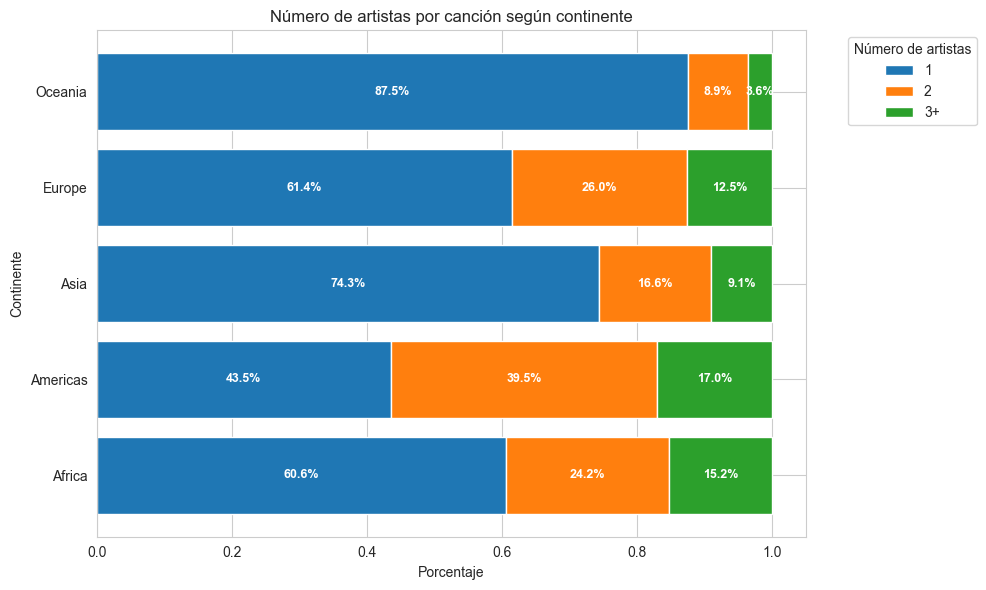

In [48]:
# Copia del dataframe para no alterar el original
conteo_artistas = num_artists_summary.copy()

# Pivotar para gráfico apilado
pivot_df = conteo_artistas.pivot(index='region', columns='no_of_artists', values='percentage').fillna(0)

# Asegurar orden de columnas
pivot_df = pivot_df[['1', '2', '3+']]

# Colores personalizados
colores = {'1': '#1f77b4', '2': '#ff7f0e', '3+': '#2ca02c'}

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 6))

# Posición inicial de barras
left = [0] * len(pivot_df)

# Dibujar barras apiladas y añadir texto
for artist_type in pivot_df.columns:
    valores = pivot_df[artist_type]
    barras = ax.barh(pivot_df.index, valores, left=left, color=colores[artist_type], label=artist_type)

    # Añadir etiquetas de porcentaje sobre cada sección
    for i, (v, l) in enumerate(zip(valores, left)):
        if v > 0.01:  # No mostrar si el porcentaje es muy pequeño
            ax.text(l + v / 2, i, f"{v * 100:.1f}%", va='center', ha='center', color='white', fontsize=9, fontweight='bold')
    
    # Actualizar posición de inicio para la siguiente capa
    left = [l + v for l, v in zip(left, valores)]

# Títulos y etiquetas
ax.set_xlabel('Porcentaje')
ax.set_ylabel('Continente')
ax.set_title('Número de artistas por canción según continente')

# Leyenda fuera del gráfico
ax.legend(title='Número de artistas', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar diseño para que quepa la leyenda
plt.tight_layout()

# Mostrar
plt.show()



### Puntos Clave

En Asia, reina la individualidad: casi tres de cada cuatro canciones (74%) son interpretadas por un solo artista. Las colaboraciones son menos frecuentes, con un 17% de canciones a dúo y solo un 9% involucrando tres o más artistas. Una estructura más solista, quizás reflejo de industrias muy centradas en artistas ídolo o grupos con una sola cara visible.

Oceanía es aún más marcada: un impresionante 88% de los temas tienen un único intérprete. Las colaboraciones múltiples son excepcionales, con solo un 4% de canciones en la categoría de 3 o más artistas. Aquí, la autoría individual domina casi sin discusión.

En cambio, las Américas narran una historia de cooperación: el 43% de las canciones son individuales, pero un sólido 39% son duetos y un notable 17% reúnen tres o más voces. Es la región donde las colaboraciones están más equilibradas, tal vez impulsadas por la cultura del remix, las "featurings" y los cruces entre géneros y mercados.

África y Europa se sitúan en puntos intermedios. En ambas, el 61% de los temas son interpretados por un solo artista, pero también se aprecia una buena cuota de colaboraciones: en África, el 24% son a dúo y el 15% reúnen tres o más; mientras que Europa cuenta con un 26% de duetos y un 13% de canciones con múltiples voces.

Así, el número de artistas por canción se convierte en un reflejo cultural: desde el foco en la individualidad hasta el espíritu de colaboración, cada región aporta su estilo a la sinfonía global del éxito musical.

### Análisis de artistas tops por país

Una vez analizadas las colaboraciones, quiero centrarme en el aspecto geográfico, por lo que vamos a ver que artista ha sido más popular por cada país y en cada continente, para ello vamos a sumar las veces que aparece como artista principal en los TOPs y contar el número de países en el que sucede para ver su relevancia general, lo cual nos ayudará a tener una visión más clara del panorama musical del momento.

In [34]:
# Seleccionar columnas necesarias
top_artist_data = spotify_72paises[['country_name', 'main_artist', 'region']].copy()

# Contar cuántas veces aparece cada artista por país
top_artist_data['artist_count'] = top_artist_data.groupby(['country_name', 'main_artist'])['main_artist'].transform('count')

# Obtener el artista más frecuente por país (si hay empate, se queda uno arbitrariamente)
top_artist_per_country = (
    top_artist_data
    .sort_values(['country_name', 'artist_count'], ascending=[True, False])
    .drop_duplicates(subset='country_name')
    .rename(columns={'main_artist': 'Top_Artist', 'country_name': 'Country_name'})
    [['Country_name', 'Top_Artist']]
    .reset_index(drop=True)
)

# Contar en cuántos países fue top artista cada uno
top_artist_count_summary = (
    top_artist_per_country
    .groupby('Top_Artist')
    .size()
    .reset_index(name='number_of_countries')
    .sort_values(by='number_of_countries', ascending=False)
    .reset_index(drop=True)
)

# Mostrar resultados
print("Top Artist por país (de los 72 países):")
pd.set_option('display.max_rows', None)
print(top_artist_per_country)
pd.reset_option('display.max_rows')

Top Artist por país (de los 72 países):
            Country_name           Top_Artist
0              Argentina              Luck Ra
1              Australia        Billie Eilish
2                Austria        Billie Eilish
3                Belarus                uniqe
4                Belgium        Billie Eilish
5                Bolivia       Grupo Frontera
6                 Brazil  Zé Neto & Cristiano
7               Bulgaria                 Medi
8                 Canada        Billie Eilish
9                  Chile          Kidd Voodoo
10              Colombia                 Feid
11            Costa Rica                 Feid
12        Czech Republic                Calin
13               Denmark        Billie Eilish
14    Dominican Republic                  NTG
15               Ecuador                 Feid
16                 Egypt           Essam Sasa
17           El Salvador                 Feid
18               Estonia        Billie Eilish
19               Finland               K

In [35]:
#Numero de paieses en los que fue top artista
print("\nArtistas más repetidos como top en países:")
print(top_artist_count_summary)


Artistas más repetidos como top en países:
             Top_Artist  number_of_countries
0         Billie Eilish                   18
1                  Feid                    7
2          Taylor Swift                    3
3         Fuerza Regida                    2
4        Grupo Frontera                    2
5             Jung Kook                    2
6                  BINI                    1
7                  Bakr                    1
8                 Calin                    1
9                BARBEL                    1
10             Azahriah                    1
11             Aventura                    1
12         ElGrandeToto                    1
13           Essam Sasa                    1
14              Bolaget                    1
15                 Gleb                    1
16          Hafdís Huld                    1
17          Jessica Shy                    1
18               KUUMAA                    1
19              Geolier                    1
20         

In [36]:
# Seleccionar columnas necesarias
top_artist_data = spotify_72paises[['region', 'main_artist']].copy()

# Contar cuántas veces aparece cada artista por región
top_artist_data['artist_count'] = top_artist_data.groupby(['region', 'main_artist'])['main_artist'].transform('count')

# Obtener el artista más frecuente por región (si hay empate, se queda uno arbitrariamente)
top_artist_per_region = (
    top_artist_data
    .sort_values(['region', 'artist_count'], ascending=[True, False])
    .drop_duplicates(subset='region')
    .rename(columns={'main_artist': 'Top_Artist', 'region': 'Region'})
    [['Region', 'Top_Artist']]
    .reset_index(drop=True)
)

# Contar en cuántas regiones fue top artista cada uno
top_artist_region_count = (
    top_artist_per_region
    .groupby('Top_Artist')
    .size()
    .reset_index(name='number_of_regions')
    .sort_values(by='number_of_regions', ascending=False)
    .reset_index(drop=True)
)

# Mostrar resultados
print("Top Artist por continente:")
print(top_artist_per_region)


Top Artist por continente:
     Region     Top_Artist
0    Africa   ElGrandeToto
1  Americas           Feid
2      Asia  Billie Eilish
3    Europe  Billie Eilish
4   Oceania  Billie Eilish


A continuación  vamos a presentar algunos datos numéricos en relación con los parámetros geográficos que tenemos (país y continente), para mostrar agrupados por continente y cada país el % de veces que un artista aparece en el TOP respectivo por país

In [37]:
# Contar apariciones por artista y país
appearances_per_artist_country = (
    spotify_72paises
    .groupby(['region', 'country_name', 'main_artist'])
    .size()
    .reset_index(name='appearances')
)

# Total de apariciones por país
total_by_country = (
    appearances_per_artist_country
    .groupby(['country_name'])['appearances']
    .sum()
    .reset_index(name='total_appearances')
)

# Unir ambos para calcular el % de cada artista
artist_with_percent = appearances_per_artist_country.merge(
    total_by_country,
    on='country_name'
)
artist_with_percent['percentage'] = round(
    100 * artist_with_percent['appearances'] / artist_with_percent['total_appearances'],
    2
)

# Obtener el artista top por país
top_artist_per_country = (
    artist_with_percent
    .sort_values(['country_name', 'appearances'], ascending=[True, False])
    .drop_duplicates(subset=['country_name'])
    .sort_values(['region', 'country_name'])
    [['region', 'country_name', 'main_artist', 'percentage']]
    .rename(columns={
        'region': 'Region',
        'country_name': 'Country',
        'main_artist': 'Top_Artist',
        'percentage': 'Percentage_of_Chart'
    })
    .reset_index(drop=True)
)

# Mostrar como tabla organizada por región
for region in top_artist_per_country['Region'].unique():
    print(f"\n{region.upper()}:")
    region_df = top_artist_per_country[top_artist_per_country['Region'] == region]
    print(region_df[['Country', 'Top_Artist', 'Percentage_of_Chart']].to_string(index=False))


AFRICA:
     Country    Top_Artist  Percentage_of_Chart
       Egypt    Essam Sasa                 8.38
     Morocco  ElGrandeToto                12.00
     Nigeria    Seyi Vibez                 8.88
South Africa Billie Eilish                 4.69

AMERICAS:
           Country          Top_Artist  Percentage_of_Chart
         Argentina             Luck Ra                 8.94
           Bolivia      Grupo Frontera                11.75
            Brazil Zé Neto & Cristiano                 5.94
            Canada       Billie Eilish                11.75
             Chile         Kidd Voodoo                15.50
          Colombia                Feid                18.12
        Costa Rica                Feid                10.25
Dominican Republic                 NTG                 8.44
           Ecuador                Feid                11.56
       El Salvador                Feid                 9.75
         Guatemala       Fuerza Regida                 8.88
          Honduras  

Todos estos datos que acabamos de obtener muestran a Billie Eilish como la gran protagonista del panorama musical en el periodo estudiado en el EDA (sacando un álbum incluso), es TOP1 con 18 de los 72 países (25%) dominando Europa, Asia y Oceanía. Otro artista destacado es Feid siendo TOP en 7 países, todos en América, destacando Colombia y Ecuador, lo cual lo consolidan como un fenómeno en la zona de América Latina. También merecen una mención especial Taylor Swift, Fuerza Regida, Grupo Frontera y Jung Kook con impactos relevantes es múltiples países

El continente americano es el que mayor diversidad de artista tiene en los TOP. Feid lidera en número de países (+del 15% de apariciones en los mencionados Colombia y Ecuador), pero Grupo Frontera, Fuerza Regida, y Taylor Swift dominan en sus respectivos nichos.

En el viejo continente Billie Eilish es claramente la reina (top en 13 países), a lo largo y ancho del continente (Desde Irlanda con un 11.5% hasta Estonia con 11.06%). También cabe destacar dos artistas que superan el 20% aunque sea solo en un país: Hay artistas locales con fuerte presencia en su país: Azahriah (26.81%) en Hungría y Hafdís Huld (21.88%) en Islandia. 

En Asia hay mucha diversidad regional, aunque Billie Eilish sigue presente (top en 2 países). Descatan con apariciones por encima del 15%, Mrs. GREEN APPLE (22.25%) en Japón, Omer Adam (17.06%) en Israel y Lim Young Woong (15.5%) en Korea del Sur.

Viajando a África seguimos de la mano de Billie Eilish (top en Sudafrica), el resto tienen más a la localía, por ejemplo: ElGrandeToto en Marruecos (12%) y Seyi Vibez en Nigeria.

El continente oceánico por su parte está dominado por completo por Billie Eilish, llegando a alcanzar un % de apariciones del 14.5%

A modo de resumen, se puede decir que hay un equilibrio entre fenomenos mundiales (Billie Eilish y Taylor Swift por ejemplo), y artistas locales. La diversidad sobre todo se hace evidente en América y Asia, donde las escenas locales cobran mayor peso.

### Análisis de los atributos musicales por geografía

Una vez analizados los artistas TOPs, vamos a centrarnos es los parámetros que definen una canción para Spotify. Vamos a ver si la diversidad de artistas se refleja también en las características de las canciones, o si por el contrario, la fórmula del éxito es algo universal y las canciones exitosas comparten características. Por un lado vamos a analizar las variables continuas (las que tienen valores entre 0 y 1)

In [38]:
# Agrupar por continente y país, calcular la media de cada variable continua
attributes_by_country = (
    spotify_72paises
    .groupby(['region', 'country_name'], as_index=False)
    [['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
    .mean()
    .round(2)
)

# Mostrar tabla
pd.set_option('display.max_rows', None)
display(attributes_by_country)
pd.reset_option('display.max_rows')

,region,country_name,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,Africa,Egypt,0.73,0.72,0.09,0.33,0.00,0.17,0.66
1,Africa,Morocco,0.69,0.61,0.14,0.39,0.00,0.14,0.58
2,Africa,Nigeria,0.73,0.68,0.14,0.32,0.03,0.15,0.63
3,Africa,South Africa,0.73,0.60,0.08,0.13,0.08,0.13,0.52
4,Americas,Argentina,0.71,0.70,0.09,0.21,0.00,0.19,0.65
5,Americas,Bolivia,0.70,0.72,0.08,0.27,0.01,0.19,0.63
6,Americas,Brazil,0.68,0.70,0.15,0.40,0.01,0.34,0.63
7,Americas,Canada,0.63,0.59,0.07,0.25,0.02,0.14,0.47
8,Americas,Chile,0.76,0.69,0.10,0.21,0.01,0.17,0.61
9,Americas,Colombia,0.77,0.70,0.12,0.23,0.00,0.18,0.63


In [39]:
attributes_by_region = (
    spotify_72paises
    .groupby('region', as_index=False)
    [['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
    .mean()
    .round(2)
)

display(attributes_by_region)

,region,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,Africa,0.72,0.65,0.11,0.29,0.03,0.15,0.60
1,Americas,0.73,0.68,0.10,0.25,0.01,0.18,0.61
2,Asia,0.64,0.60,0.07,0.33,0.02,0.15,0.50
3,Europe,0.69,0.66,0.10,0.22,0.03,0.16,0.54
4,Oceania,0.63,0.57,0.07,0.26,0.03,0.13,0.48


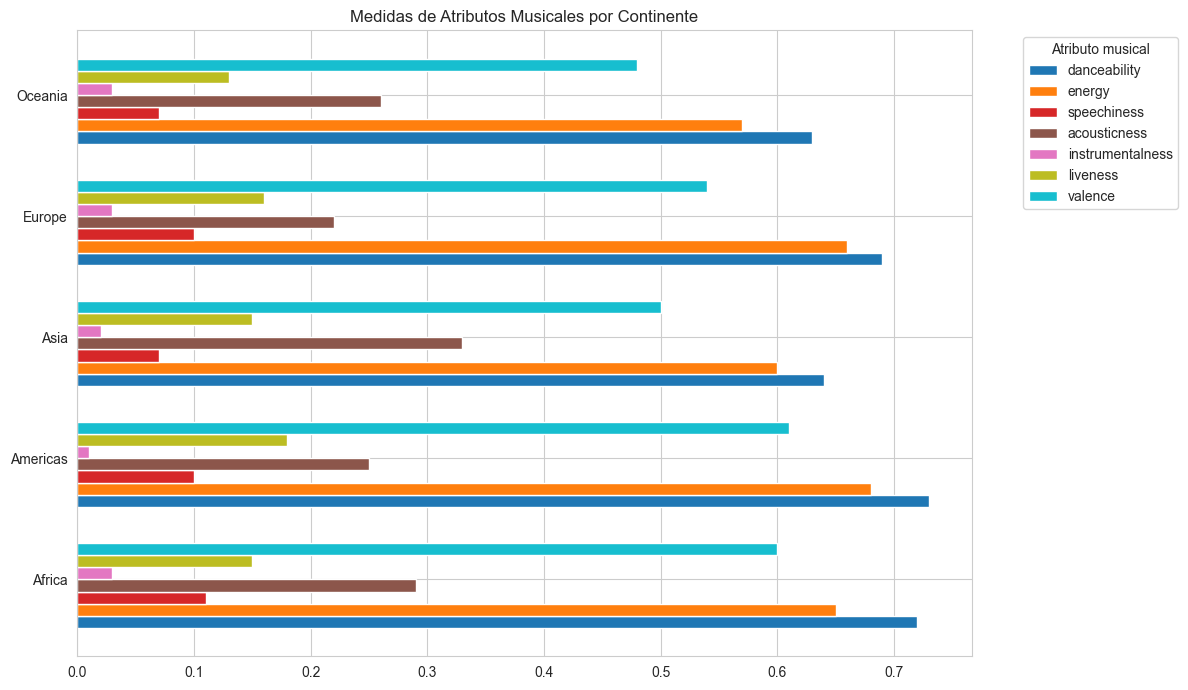

In [52]:
# Atributos que quieres analizar
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Agrupar por continente y calcular promedio de los atributos
attributes_by_region = (
    spotify_72paises
    .groupby('region')[features]
    .mean()
    .round(2)
)

# Reorganizar para gráfico, las filas son los continentes y las columnas son los atributos
df = attributes_by_region

# Preparar el gráfico
regions = df.index.tolist()
x = np.arange(len(regions))  # posiciones verticales
bar_width = 0.1

# Crear figura
fig, ax = plt.subplots(figsize=(12, 7))

# Colores para cada característica
colors = plt.colormaps.get_cmap('tab10').resampled(len(features))

# Dibujar cada característica como barra horizontal dentro del grupo (por continente)
for i, feature in enumerate(features):
    ax.barh(
        x + (i - len(features)/2)*bar_width,
        df[feature],
        height=bar_width,
        label=feature,
        color=colors(i)
    )

# Etiquetas y formato
ax.set_yticks(x)    
ax.set_yticklabels(regions)
ax.set_title('Medidas de Atributos Musicales por Continente')
ax.legend(title='Atributo musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


A través del análisis los atributos musicales clave, se pueden identificar patrones sonoros distintivos por continente. Esto seguramente no solo se deba a temas técnicos sino también al trasfondo cultural y emocional de las preferencias musicales de los oyentes de cada región.  

Por ejemplo África destaca como una de las regiones donde dominan temas bailables y energéticos, además de ser bastante positivos (valence), y en cierta manera acústicos, esto último podría ser herencia de su música tradicional donde destacan la percusión, el canto y la conexión con lo tradicional.

América también está predominada por temas bailables y positivos, con un tercer sustento en una energía alta. El valor tan bajo de lo acústico, y por tanto predominio de lo digital, es un reflejo del dominio géneros urbanos y latinos como el reggaeton o el trap.  

Si hablamos de Asia, volamos a un ambiente más introspectivo y acústico, con sonidos más suaves, calmados y reflexivos. Aunque hay países donde empiezan a destacar otro tipo de ritmos (Por ejemplo Japón o Korea, con el J-Pop y K-Pop respectivamente). 

El viejo continente tiene equilibrio en casi todos los atributos, aunque con tendencia a ritmos altamente energéticos y bailables y positivos, con ciertos toques acústicos en algunos mercados. Esto nos da a entender la gran diversidad que hay en el continente, o incluso como los ritmos modernos se combinan con algunos más tradicionales.

En Oceanía destacan las canciones bailables pero sin sobresaltos, enfocándose en contar historias y el confort emocional. 

En resumen, los gustos musicales forman parte de la identidad cultural, mostrándose más alegres y energéticos en África y América (con gran influencia de la zona latina), encontrando algo más de equilibrio (o diversidad) en Europa, frente a un ambiente más acústico y reflexivo en el hemisferio este del mundo. 

Y ahora procedemos con el resto de variables:

In [41]:
# Transformar otra vez la duración de mm:ss a decimal (minutos) para facilitar el análisis
def mmss_to_decimal(duration_str):
    minutes, seconds = map(int, duration_str.split(':'))
    return minutes + seconds / 60

# Aplica la función a la columna
spotify_72paises['duration_decimal'] = spotify_72paises['duration'].apply(mmss_to_decimal)

# Agrupar por continente y país, calcular la media de cada variable continua
attributes_by_country2 = (
    spotify_72paises
    .groupby(['region', 'country_name'], as_index=False)
    [['loudness', 'tempo', 'duration_decimal']]
    .mean()
    .round(2)
)

# Mostrar tabla
pd.set_option('display.max_rows', None)
display(attributes_by_country2)
pd.reset_option('display.max_rows')

,region,country_name,loudness,tempo,duration_decimal
0,Africa,Egypt,-5.57,115.97,3.64
1,Africa,Morocco,-8.06,120.51,3.27
2,Africa,Nigeria,-7.26,111.45,2.80
3,Africa,South Africa,-8.39,122.23,4.63
4,Americas,Argentina,-5.20,115.64,3.05
5,Americas,Bolivia,-5.03,121.98,3.07
6,Americas,Brazil,-4.75,123.59,3.08
7,Americas,Canada,-7.05,131.74,3.55
8,Americas,Chile,-5.42,108.33,3.12
9,Americas,Colombia,-5.10,122.09,3.17


In [42]:
attributes_by_region = (
    spotify_72paises
    .groupby('region', as_index=False)
    [['loudness', 'tempo', 'duration_decimal']]
    .mean()
    .round(2)
)

display(attributes_by_region)

,region,loudness,tempo,duration_decimal
0,Africa,-7.32,117.54,3.59
1,Americas,-5.59,120.45,3.20
2,Asia,-6.93,120.57,3.41
3,Europe,-6.61,125.54,3.06
4,Oceania,-7.37,130.29,3.48


África presenta un volumen moderadamente bajo, aunque al ser un continente tan grande presentan los diferentes extremos en cuanto volumen, siendo más alto en Egipto, frente al dominio de lo acústico o ambiental en Marruecos y Sudáfrica, continuando esta diferencia si hablamos de tempos. Lo que sí cabe destacar es la variedad en la duración de las canciones, siendo las más cortas en Nigeria mientras que Sudáfrica tiene el promedio más largo de todas las naciones africanas.

En América encontramos el perfil más potente hablando de volumen, con música bastante intensa, directa y vibrante. En América del Sur (Brasil, Bolivia y Argentina, entre otros), predominan las mezclas potentes, mientras que en América del Norte (EEUU y Canadá), predominan los tempos altos (quizás por la música electrónica), con una duración promedio en todo el continente

En Asia, siguiendo la tendencia de los otros atributos, se tiende más a los db medio-bajos, con un tempo inferior al del continente americano, por ejemplo. Tenemos el contraste de nuevo de Japón con un volumen superior a la media, y en cuanto a duración, destacan Vietnam e Indonesia.

El viejo continente muestra gran homogeneidad en cuanto al volumen, aunque hay gran variedad en cuanto a los tempos (influye a música EDM y el Techno, bastante populares en el continente), y siendo el lugar con las canciones más cortas (sobre 3 minutos).

En Oceanía el volumen es bajo (en consonancia con lo acústico que vimos antes), aunque paradójicamente tienen el tempo más alto de todos, y con una duración promedio de las canciones.

In [43]:
# Agrupar por continente y key_americana
key_summary = (
    spotify_72paises
    .groupby(['region', 'key_americana', 'key_latina'])
    .size()
    .reset_index(name='count')
)

# Calcular total por región y el porcentaje
key_summary['Total'] = key_summary.groupby('region')['count'].transform('sum')
key_summary['percentage'] = round(key_summary['count'] / key_summary['Total'], 2)

# Seleccionar columnas relevantes
key_summary_final = key_summary[['region', 'key_americana', 'key_latina', 'percentage']]
key_summary_final.rename(columns={'region': 'Continent', 'key_americana': 'Key'})

display(key_summary_final)


,region,key_americana,key_latina,percentage
0,Africa,A,La,0.07
1,Africa,A♯/B♭,La♯/Si♭,0.07
2,Africa,B,Si,0.10
3,Africa,C,Do,0.09
4,Africa,C♯/D♭,Do♯/Re♭,0.15
5,Africa,D,Re,0.10
6,Africa,D♯/E♭,Re♯/Mi♭,0.03
7,Africa,E,Mi,0.04
8,Africa,F,Fa,0.08
9,Africa,F♯/G♭,Fa♯/Sol♭,0.10


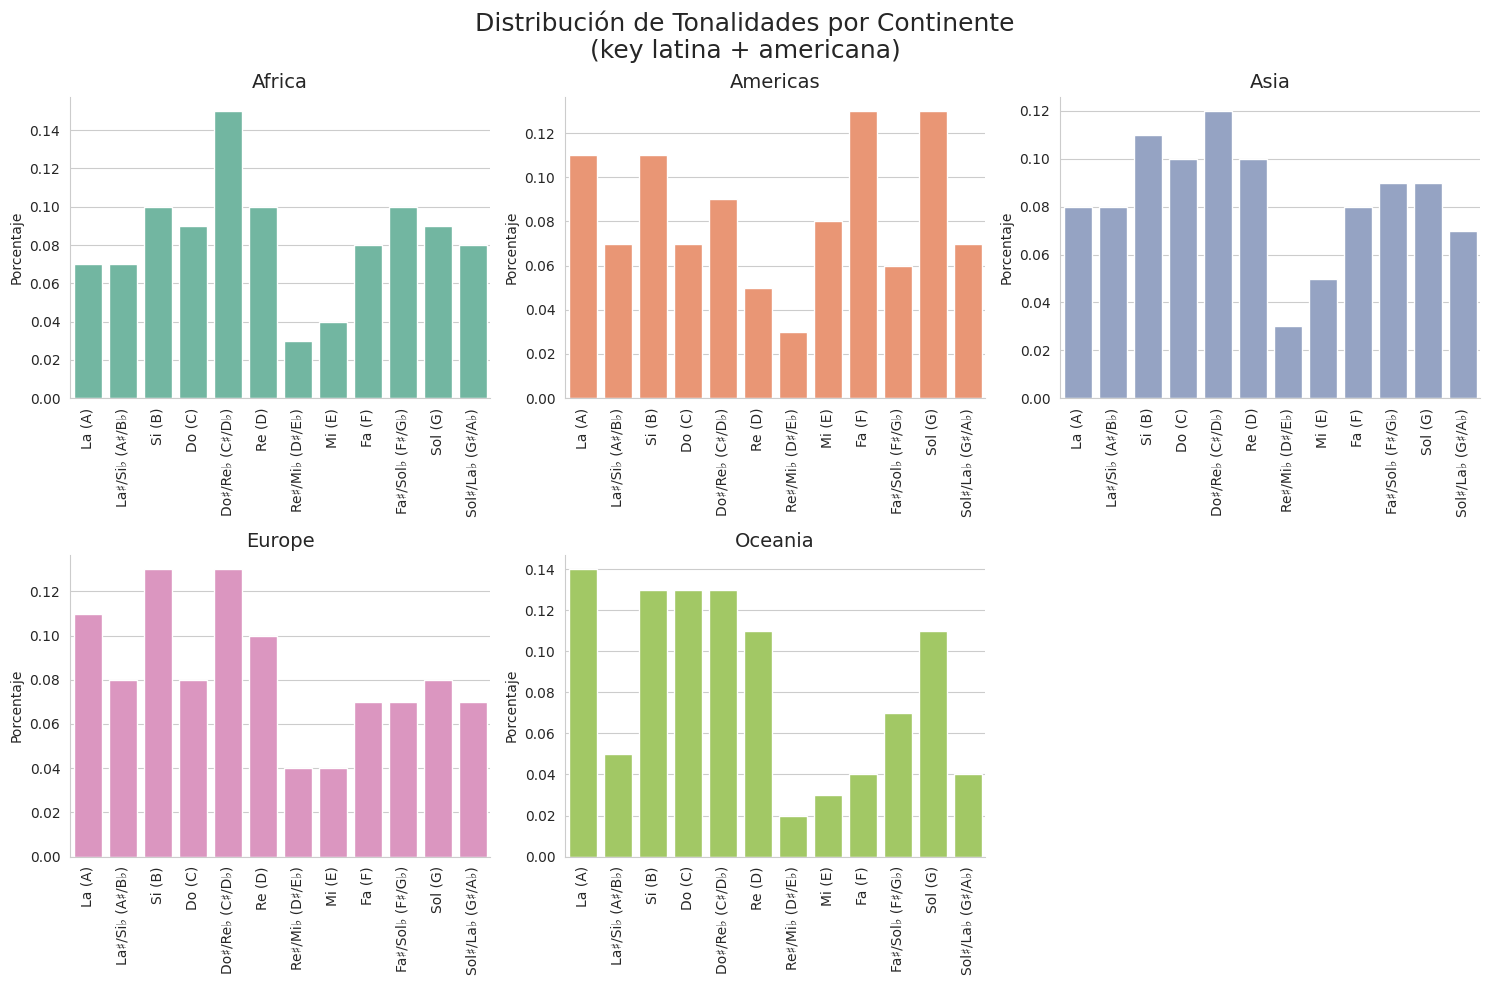

In [54]:
#Forzar fuente diferente para evitar errores al renderizar caracteres especiales:
plt.rcParams['font.family'] = 'DejaVu Sans'

# Crear etiqueta combinada de tonalidad
key_summary_final = key_summary_final.copy()
key_summary_final['Key_Label'] = key_summary_final['key_latina'] + ' (' + key_summary_final['key_americana'] + ')'
key_summary_final = key_summary_final.rename(columns={'region': 'Continent'})


# Paleta de colores únicos por continente
continent_palette = {
    continent: color for continent, color in zip(
        key_summary_final['Continent'].unique(), 
        sns.color_palette("Set2", n_colors=key_summary_final['Continent'].nunique())
    )
}

# Crear el FacetGrid para barras verticales
g = sns.FacetGrid(
    key_summary_final,
    col="Continent",
    col_wrap=3,
    height=5,
    sharex=False,
    sharey=False
)

# Asignar color único a cada panel manualmente
for ax, (continent, color) in zip(g.axes.flat, continent_palette.items()):
    data_subset = key_summary_final[key_summary_final['Continent'] == continent]
    sns.barplot(
        data=data_subset,
        x="Key_Label",
        y="percentage",
        ax=ax,
        color=color
    )
    ax.set_title(continent, fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("Porcentaje")
    ax.tick_params(axis='x', rotation=90)

# Ajustes generales
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de Tonalidades por Continente\n(key latina + americana)", fontsize=18)
plt.tight_layout()
plt.show()


A pesar de tener diferentes tonalidades, parece que África prefiere las notas sostenidas o bemoles, siendo el más común el Do♯/Re♭ (C♯/D♭) seguido de Si (B) y Re (D). Esto refleja la riqueza rítmica y melódica de las músicas africanas.

El continente americano muestra una dualidad liderada por Fa (F) y Sol (G) seguidos de cerca por Si (B) y La (A). Esto sugiere canciones energéticas, pero con gran emoción, mostrando una escena muy expresiva.

Por otro lado en Asia hay un pequeño grupo predominante, Do♯/Re♭ es una de las más usadas, junto con Si, Re y Do. Esta diversidad da como resultado músicas cálidas y accesibles, con una mezcla entre melodías orientales clásicas y música moderna.

Por ultimo Australia y Nueva Zelanda, tienen una distribución muy homogénea, lo que sugiere melodías armónicas estables y repetidas, las más usadas en géneros como el Pop.

Estas claves son la base emocional y cultural sobre la que se construye la identidad sonora de cada región. Analizarlas nos muestra además del sonido cómo se piensa y se siente en cada rincón del planeta.

In [ ]:
# Agrupar por continente y escala
escala_summary = (
    spotify_72paises
    .groupby(['region', 'escala_musical'])
    .size()
    .reset_index(name='count')
)

# Calcular porcentaje dentro de cada región
escala_summary['total'] = escala_summary.groupby('region')['count'].transform('sum')
escala_summary['percentage'] = round(escala_summary['count'] / escala_summary['total'] * 100, 2)

# Renombrar para claridad
escala_summary.rename(columns={'region': 'Continent', 'escala_musical': 'Escala'}, inplace=True)

# Mostrar tabla final
display(escala_summary[['Continent', 'Escala', 'percentage']])


,Continent,Escala,percentage
0,Africa,Mayor,43.12
1,Africa,Menor,56.88
2,Americas,Mayor,48.42
3,Americas,Menor,51.58
4,Asia,Mayor,66.20
5,Asia,Menor,33.80
6,Europe,Mayor,53.75
7,Europe,Menor,46.25
8,Oceania,Mayor,78.97
9,Oceania,Menor,21.03


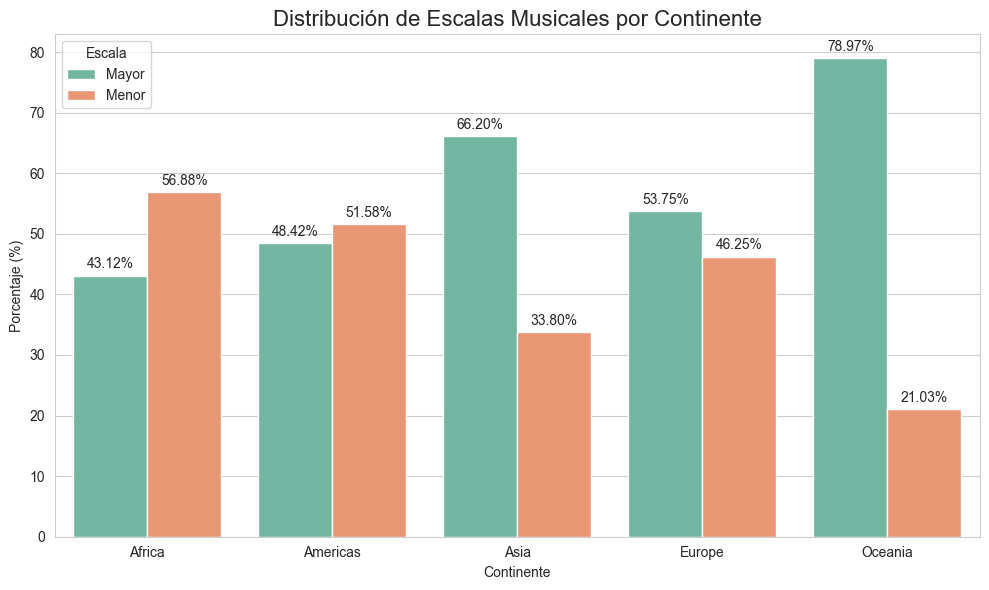

In [46]:
# Crear figura
plt.figure(figsize=(10, 6))

# Crear el gráfico
ax = sns.barplot(
    data=escala_summary,
    x='Continent',
    y='percentage',
    hue='Escala',
    palette='Set2'
)

# Añadir etiquetas de porcentaje sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3, fontsize=10)

# Ajustes de estilo
plt.title("Distribución de Escalas Musicales por Continente", fontsize=16)
plt.ylabel("Porcentaje (%)")
plt.xlabel("Continente")
plt.legend(title="Escala")
plt.tight_layout()

# Mostrar
plt.show()



En África la mayoría de canciones son en tonalidades menores, lo que sugiere música con carga emocional intensa, matices melancólicos o espirituales, ligados a veces a las narrativas con peso histórico-cultural del continente. Aun así, el equilibrio con escalas mayores muestra la energía rítmica y expresiva característica de la música del continente.

En el continente americano la división es casi perfecta, lo cual puede ser una muestra de la dualidad entre América del Norte y América del Sur, siendo este último más propenso a la celebración, el baile y el color frente a las letras introspectivas, nostálgicas o intensas de sus vecinos del norte.

Asia es el continente con la mayor preferencia por escalas mayores. Esto da muestra del sonido limpio, melódico y positivo de géneros como el K-pop (Korea) o el J-pop (Japón). Estas tonalidades refuerzan una estética optimista, juvenil y enérgica, con menos espacio para la tristeza o lo introspectivo.

En Europa, a pesar de tener equilibrio, como en el continente americano, dominan  las escalas mayores, lo que refleja una música con predilección por lo claro y melódico, sin renunciar a lo emocional. Esto encaja bien con la diversidad de géneros en el continente (Electropop, Dance o indie).

Oceanía es la región más del mundo musical, en términos de escalas. Casi 8 de cada 10 canciones están en escalas mayores, dando a entender música enfocada al bienestar y la energía. La positividad reina en esta parte del mundo, tanto en Australia como en Nueva Zelanda.


### Correlación de atributos de las canciones  

Una vez analizados todos los atributos de las canciones a nivel global y con un enfoque más geográfico, vamos a terminar el análisis con una gráfica que relacione las variables que definen una canción entre sí.

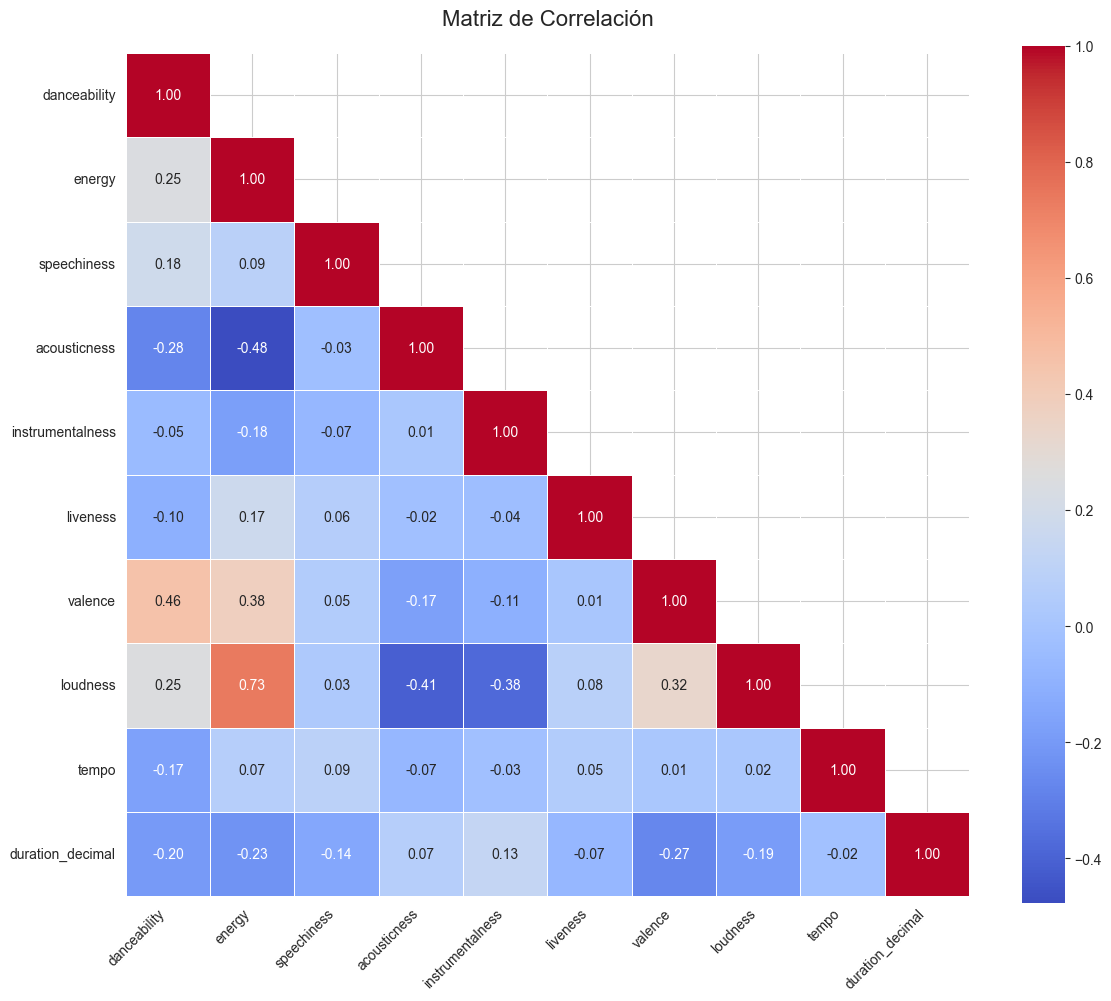

In [47]:
# Variables a analizar
variables = [
    'danceability', 'energy', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'loudness',
    'tempo', 'duration_decimal'
]

# Calcular la matriz de correlación
corr_matrix = spotify_72paises[variables].corr()

# Crear una máscara para ocultar solo la parte superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Ajustes estéticos
plt.title("Matriz de Correlación", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', )
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()



Analizando el gráfico de correlación, observamos lo siguiente:  

Top 3 relaciones positivas:
- Loudness – Energy  
- Valence – Danceability  
- Valence – Energy

Top 3 relaciones negativas:  
- Acousticness – Energy  
- Acousticness – Loudness  
- Acousticness – Danceability

Las canciones con mayor energía tienden a ser más fuertes en volumen. No es casualidad que los temas más bailables y poderosos también tengan una presencia sonora más intensa. La valencia, representando lo positiva o alegre que es una canción, está ligada al ritmo y la energía, por lo que la música más alegre suele tener más ritmo y vitalidad, lo que hace que sea ideal para fiestas y momentos de euforia.

En el extremo opuesto, las canciones acústicas, suelen ser menos energéticas, ruidosa y bailables, ya que estos temas buscan conectar emocionalmente más que incitar al movimiento, siendo más introspectivas, suaves o melancólicas.